In [59]:
# Librairies et fonctions

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [60]:
# Fonction pour générer des données aléatoires pour chaque variable
def generate_data(num_samples):
    data = []
    
    # Génération des données pour l'échantillon
    for _ in range(num_samples):
        # Unité de formation et de recherche (UFR) de l'étudiant : 
        ufr = random.choice(["ST", "SEG", "LSH"])  # ST = Sciences et Technologies, SEG = Sciences Economiques et de Gestion, LSH = Lettres et Sciences Humaines

        # Filière spécifique de l'étudiant :
        filiere = random.choice(["MPCI", "SVT", "SEG", "Geographie", "LM", "HA", "Philo"])

        # Sexe de l'étudiant :
        sexe = random.choice(["Masculin", "Feminin"])

        # Niveau académique de l'étudiant :
        niveau = random.choice(["L1", "L2", "L3"])  # L1 = 1ère année de Licence, L2 = 2ème année, L3 = 3ème année

        # Fréquence d'utilisation de la connexion gratuite :
        frequency = random.choice(["Quotidienne", "Hebdomadaire", "Occasionnelle"])

        # Durée moyenne que chaque étudiant passe en ligne à chaque session, variant de 5 à 300 minutes
        duration = random.randint(5, 300)

        # Impact de la connexion sur la motivation de l'étudiant :
        motivation_impact = random.choice(["Augmenté", "Inchangé", "Diminué"])

        # La note moyenne actuelle pour évaluer la performance académique
        moyenne = random.uniform(3.50, 17.50)

        # Moyenne académique de l'étudiant avant l'accès à la connexion gratuite
        moyenne_passe = random.uniform(3.50, 17.00)

        # Moyenne académique de l'étudiant après avoir accès à la connexion gratuite (3.5 à 17.0) :
        # Cette moyenne actuelle permet d'évaluer l'impact de la connexion sur la réussite académique
        moyenne_present = random.uniform(3.50, 17.00)

        # Nombre d'heures d'étude par semaine en dehors de la connexion :
        study_hours = random.randint(1, 30)

        # Principal usage de la connexion gratuite :
        site = random.choice(["Réseaux sociax", "Recherche", "Autres"])

        # Statut de réussite :
        satut = random.choice([1, 0])

        # Ajout des données générées dans une liste de données
        data.append([ufr, filiere, sexe, niveau, frequency, duration, motivation_impact, moyenne, moyenne_passe, moyenne_present, study_hours, site, satut])

    # Création du DataFrame avec Pandas
    # Ce DataFrame contiendra toutes les données de l'échantillon, avec des colonnes représentant chaque variable
    df = pd.DataFrame(data, columns=[
        "UFR", "Filière", "Sexe", "Niveau", "Fréquence d'utilisation", 
        "Durée par session (min)", "Impact sur la motivation", "Moyenne des notes", 
        "Moyenne avant l'accès", "Moyenne actuelle", "Temps d'étude/semaine (h)", 
        "Usage de la connexion", "Statut de réussite"
    ])

    return df

# Génération de 1000 échantillons de données
df = generate_data(2000)

# Exportation vers un fichier CSV
df.to_csv("donnees_simulees.csv", index=False)

# Affichage des premières lignes pour vérifier
df.head()


,UFR,Filière,Sexe,Niveau,Fréquence d'utilisation,Durée par session (min),Impact sur la motivation,Moyenne des notes,Moyenne avant l'accès,Moyenne actuelle,Temps d'étude/semaine (h),Usage de la connexion,Statut de réussite
0,SEG,Philo,Masculin,L1,Quotidienne,138,Inchangé,11.428811,16.855653,8.785321,18,Recherche,0
1,SEG,Geographie,Masculin,L1,Quotidienne,209,Inchangé,10.647497,12.686134,3.775125,21,Recherche,1
2,SEG,MPCI,Masculin,L1,Occasionnelle,216,Augmenté,12.512530,13.985956,6.237750,21,Recherche,1
3,SEG,Geographie,Feminin,L3,Quotidienne,205,Diminué,6.115486,9.341862,6.674597,12,Autres,0
4,ST,SEG,Masculin,L1,Occasionnelle,212,Augmenté,9.775584,5.243999,3.827875,18,Recherche,1


In [61]:
df = pd.read_csv('donnees_simulees.csv')
df.head()

,UFR,Filière,Sexe,Niveau,Fréquence d'utilisation,Durée par session (min),Impact sur la motivation,Moyenne des notes,Moyenne avant l'accès,Moyenne actuelle,Temps d'étude/semaine (h),Usage de la connexion,Statut de réussite
0,SEG,Philo,Masculin,L1,Quotidienne,138,Inchangé,11.428811,16.855653,8.785321,18,Recherche,0
1,SEG,Geographie,Masculin,L1,Quotidienne,209,Inchangé,10.647497,12.686134,3.775125,21,Recherche,1
2,SEG,MPCI,Masculin,L1,Occasionnelle,216,Augmenté,12.512530,13.985956,6.237750,21,Recherche,1
3,SEG,Geographie,Feminin,L3,Quotidienne,205,Diminué,6.115486,9.341862,6.674597,12,Autres,0
4,ST,SEG,Masculin,L1,Occasionnelle,212,Augmenté,9.775584,5.243999,3.827875,18,Recherche,1


## Analyse de la forme

In [62]:
# Nombre de ligne et colone
df.shape

(2000, 13)

In [63]:
# Type de variable
df.dtypes.value_counts()

object     7
int64      3
float64    3
Name: count, dtype: int64

<Axes: >

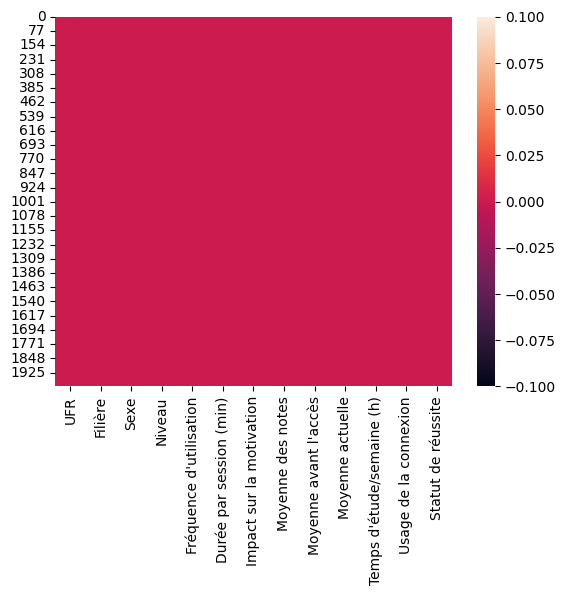

In [64]:
# Les valeurs manquante
sns.heatmap(df.isna())

In [65]:
# Examen de la variable cible
df['Statut de réussite'].value_counts(normalize=True)

Statut de réussite
1    0.5175
0    0.4825
Name: proportion, dtype: float64

## Analyse du fond

C:\Users\Ramzy Mr 17\AppData\Local\Temp\ipykernel_10044\2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Ramzy Mr 17\AppData\Local\Temp\ipykernel_10044\2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Ramzy Mr 17\AppData\Local\Temp\

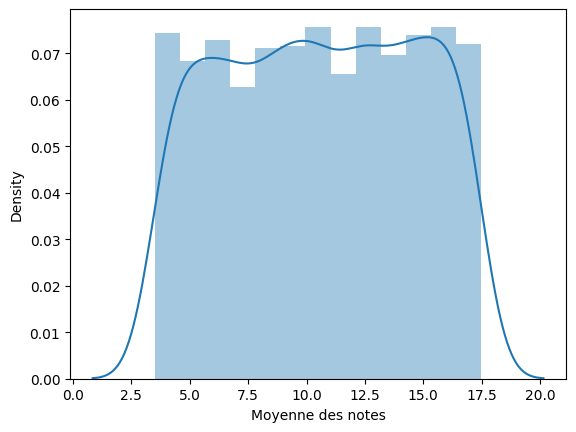

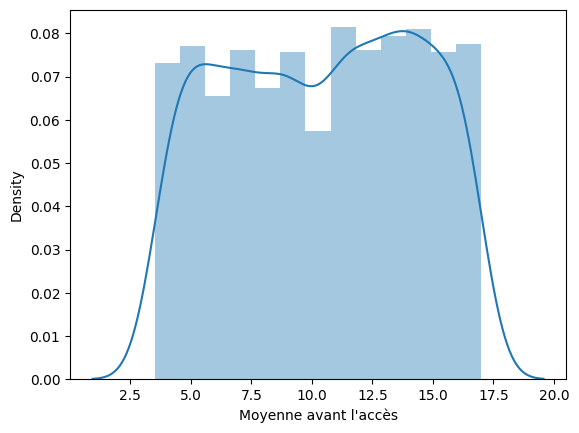

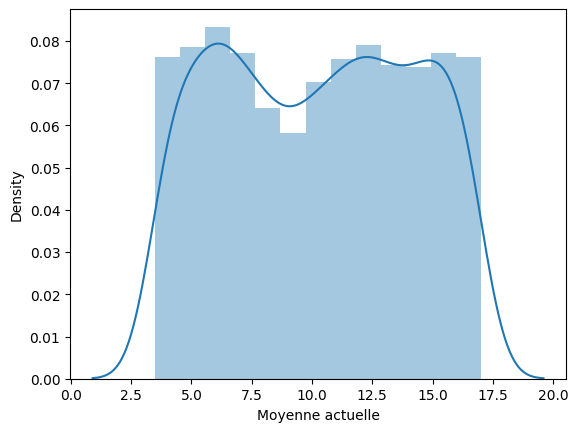

In [66]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

In [67]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

UFR----------------------------------------------- ['SEG' 'ST' 'LSH']
Filière------------------------------------------- ['Philo' 'Geographie' 'MPCI' 'SEG' 'SVT' 'LM' 'HA']
Sexe---------------------------------------------- ['Masculin' 'Feminin']
Niveau-------------------------------------------- ['L1' 'L3' 'L2']
Fréquence d'utilisation--------------------------- ['Quotidienne' 'Occasionnelle' 'Hebdomadaire']
Impact sur la motivation-------------------------- ['Inchangé' 'Augmenté' 'Diminué']
Usage de la connexion----------------------------- ['Recherche' 'Autres' 'Réseaux sociax']


## Relation Target / Variables

### Relation Target / UFR

<Axes: xlabel='UFR', ylabel='count'>

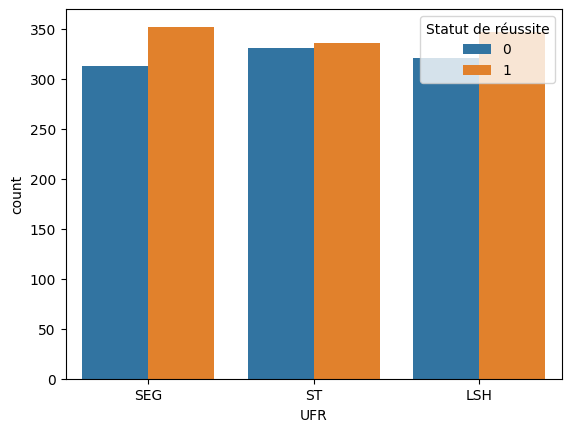

In [68]:
sns.countplot(x='UFR', hue='Statut de réussite', data=df)


<Axes: xlabel='UFR', ylabel='Statut de réussite'>

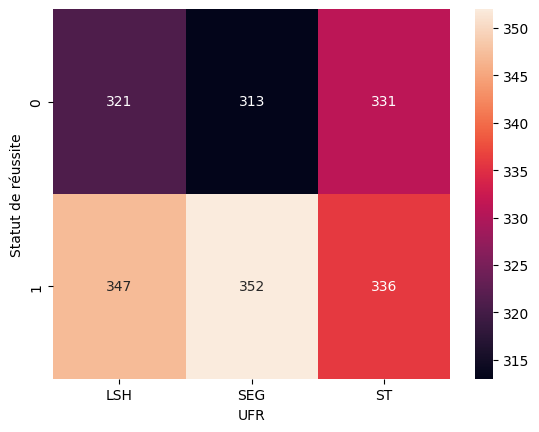

In [69]:
plt.figure()
sns.heatmap(pd.crosstab(df['Statut de réussite'], df['UFR']), annot=True, fmt='d')

### Relation Target / Filière

<Axes: xlabel='Filière', ylabel='count'>

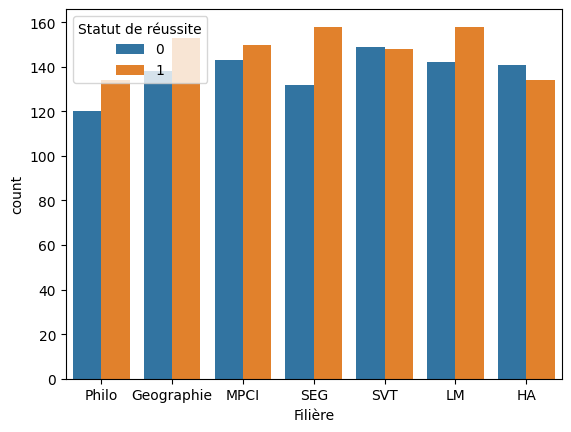

In [70]:
sns.countplot(x='Filière', hue='Statut de réussite', data=df)

### Relation Target / Niveau

<Axes: xlabel='Niveau', ylabel='count'>

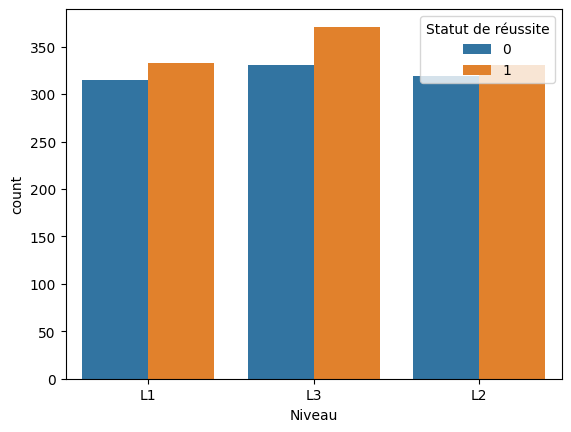

In [71]:
sns.countplot(x='Niveau', hue='Statut de réussite', data=df)

<Axes: xlabel='Niveau', ylabel='Statut de réussite'>

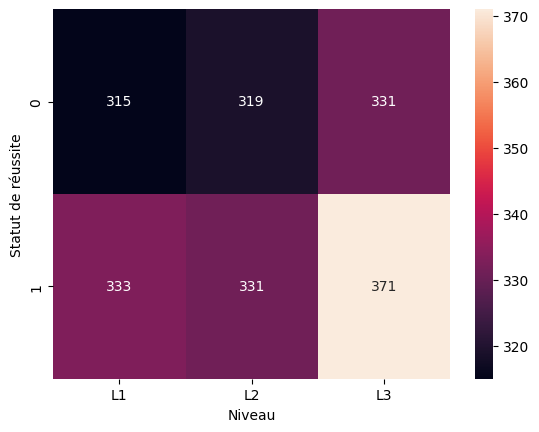

In [72]:
plt.figure()
sns.heatmap(pd.crosstab(df['Statut de réussite'], df['Niveau']), annot=True, fmt='d')

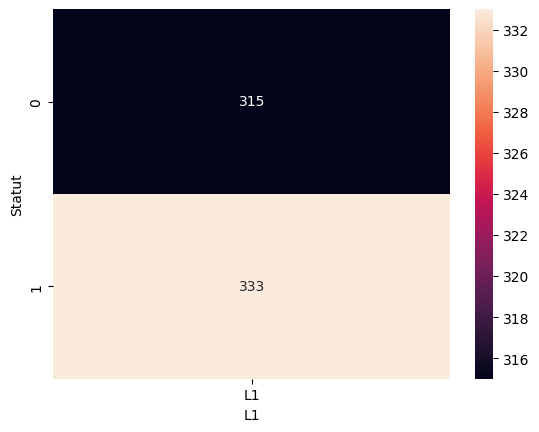

In [73]:
# Filtrer le DataFrame pour inclure uniquement les données de l'année 2011 dans la colonne 'Annee_BAC'
filtered_df = df[df['Niveau'].astype(str).str.startswith('L1')]

# Créer la heatmap basée sur la table de contingence
plt.figure()
sns.heatmap(pd.crosstab(filtered_df['Statut de réussite'], filtered_df['Niveau']), annot=True, fmt='d')
plt.xlabel('L1')
plt.ylabel('Statut')
plt.show()

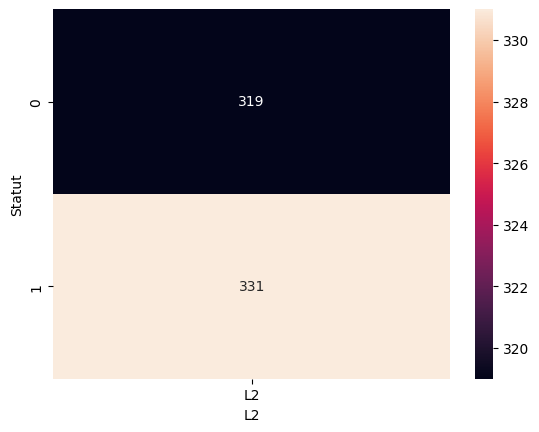

In [74]:
# Filtrer le DataFrame pour inclure uniquement les données de l'année 2011 dans la colonne 'Annee_BAC'
filtered_df = df[df['Niveau'].astype(str).str.startswith('L2')]

# Créer la heatmap basée sur la table de contingence
plt.figure()
sns.heatmap(pd.crosstab(filtered_df['Statut de réussite'], filtered_df['Niveau']), annot=True, fmt='d')
plt.xlabel('L2')
plt.ylabel('Statut')
plt.show()

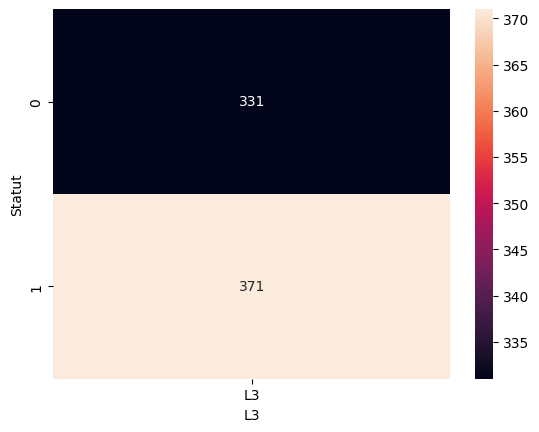

In [75]:
# Filtrer le DataFrame pour inclure uniquement les données de l'année 2011 dans la colonne 'Annee_BAC'
filtered_df = df[df['Niveau'].astype(str).str.startswith('L3')]

# Créer la heatmap basée sur la table de contingence
plt.figure()
sns.heatmap(pd.crosstab(filtered_df['Statut de réussite'], filtered_df['Niveau']), annot=True, fmt='d')
plt.xlabel('L3')
plt.ylabel('Statut')
plt.show()

### Relation Target / Fréquence d'utilisation

<Axes: xlabel="Fréquence d'utilisation", ylabel='count'>

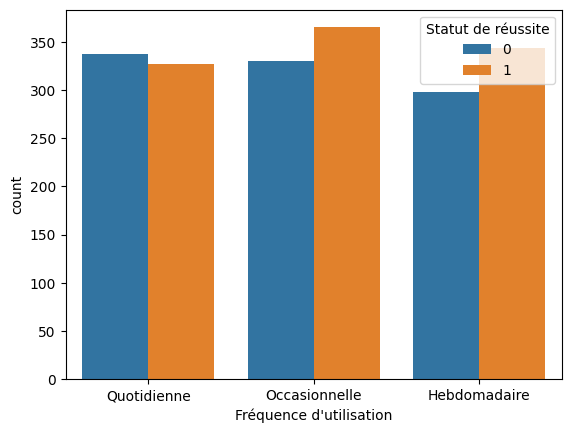

In [76]:
sns.countplot(x="Fréquence d'utilisation", hue='Statut de réussite', data=df)

<Axes: xlabel="Fréquence d'utilisation", ylabel='Statut de réussite'>

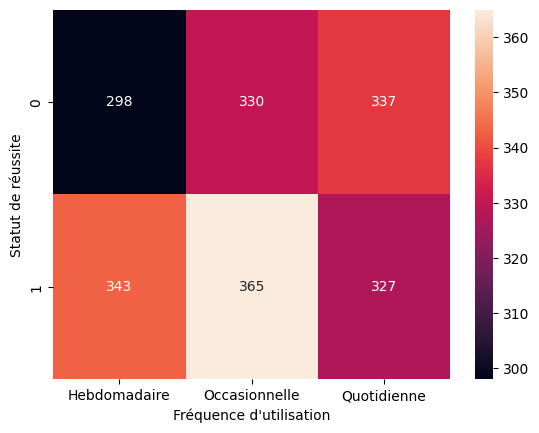

In [77]:
plt.figure()
sns.heatmap(pd.crosstab(df['Statut de réussite'], df["Fréquence d'utilisation"]), annot=True, fmt='d')

### Relation Target / Motivation

<Axes: xlabel='Impact sur la motivation', ylabel='count'>

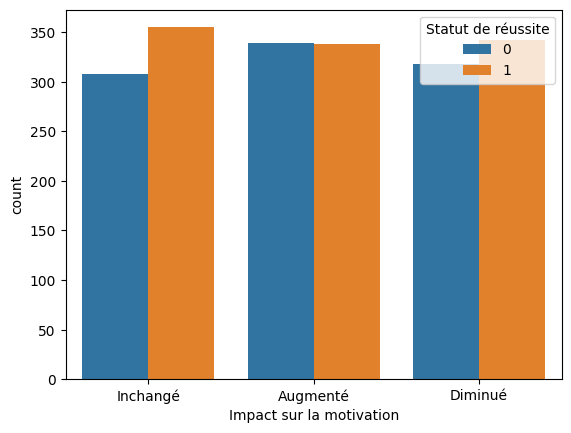

In [78]:
sns.countplot(x='Impact sur la motivation', hue='Statut de réussite', data=df)

### Relation Target / Usage

<Axes: xlabel='Usage de la connexion', ylabel='count'>

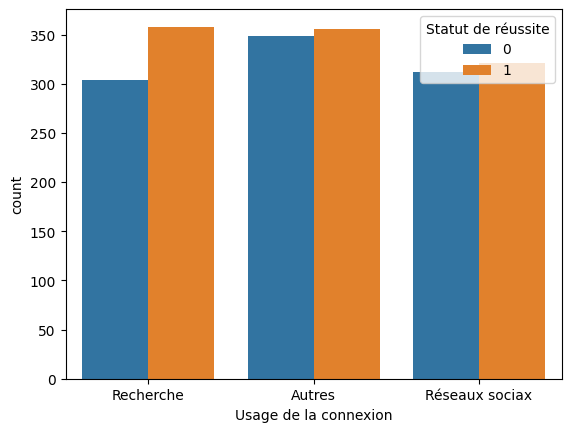

In [79]:
sns.countplot(x='Usage de la connexion', hue='Statut de réussite', data=df)

<Axes: xlabel='Usage de la connexion', ylabel='Statut de réussite'>

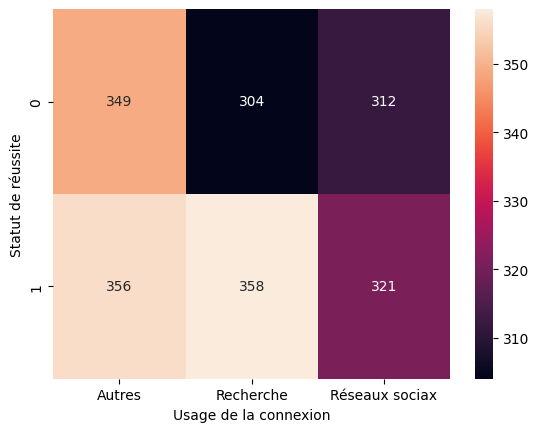

In [80]:

plt.figure()
sns.heatmap(pd.crosstab(df['Statut de réussite'], df['Usage de la connexion']), annot=True, fmt='d')

### Relation Target / Sexe

<Axes: xlabel='Sexe', ylabel='Statut de réussite'>

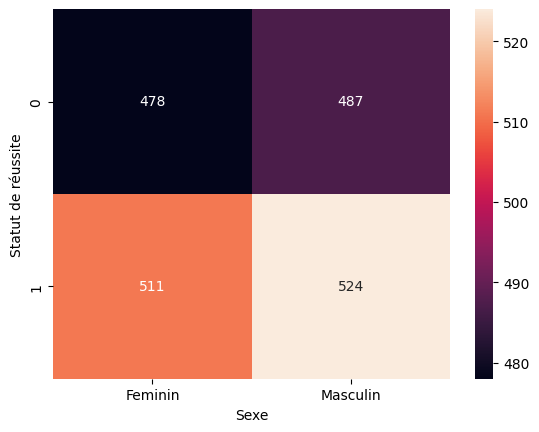

In [81]:
plt.figure()
sns.heatmap(pd.crosstab(df['Statut de réussite'], df['Sexe']), annot=True, fmt='d')

## Corrélation avec la variable cible

In [82]:
# Sélectionner uniquement les colonnes numériques et la colonne 'Mle' pour le calcul de la corrélation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculer la corrélation
correlation = numeric_df.corr()['Statut de réussite'].sort_values()

# Afficher la corrélation
print(correlation)


Moyenne avant l'accès       -0.019184
Temps d'étude/semaine (h)   -0.012224
Durée par session (min)     -0.004537
Moyenne actuelle             0.005700
Moyenne des notes            0.008353
Statut de réussite           1.000000
Name: Statut de réussite, dtype: float64


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   UFR                        2000 non-null   object 
 1   Filière                    2000 non-null   object 
 2   Sexe                       2000 non-null   object 
 3   Niveau                     2000 non-null   object 
 4   Fréquence d'utilisation    2000 non-null   object 
 5   Durée par session (min)    2000 non-null   int64  
 6   Impact sur la motivation   2000 non-null   object 
 7   Moyenne des notes          2000 non-null   float64
 8   Moyenne avant l'accès      2000 non-null   float64
 9   Moyenne actuelle           2000 non-null   float64
 10  Temps d'étude/semaine (h)  2000 non-null   int64  
 11  Usage de la connexion      2000 non-null   object 
 12  Statut de réussite         2000 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage:

## Relation Variable / Variable

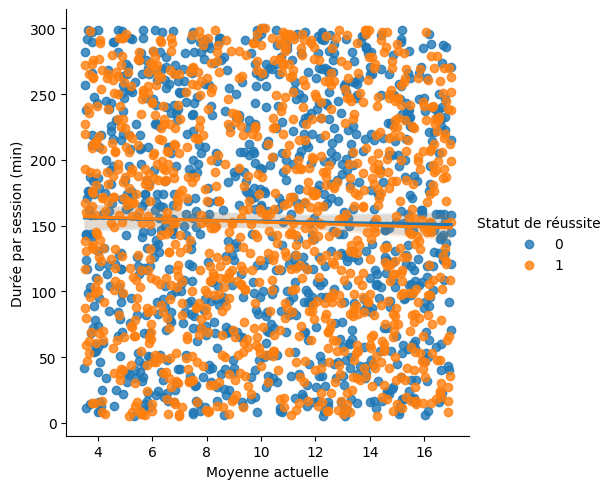

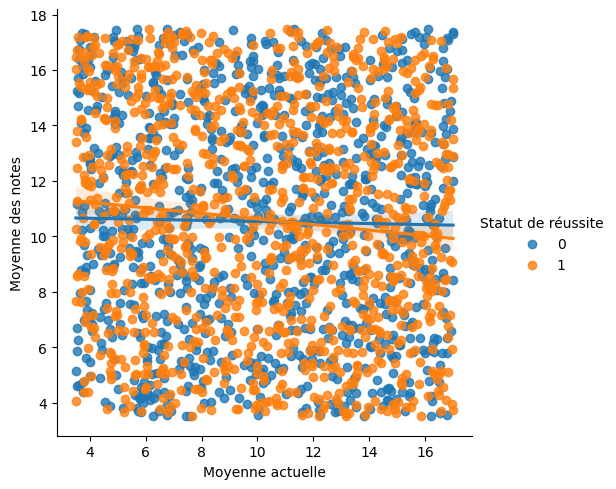

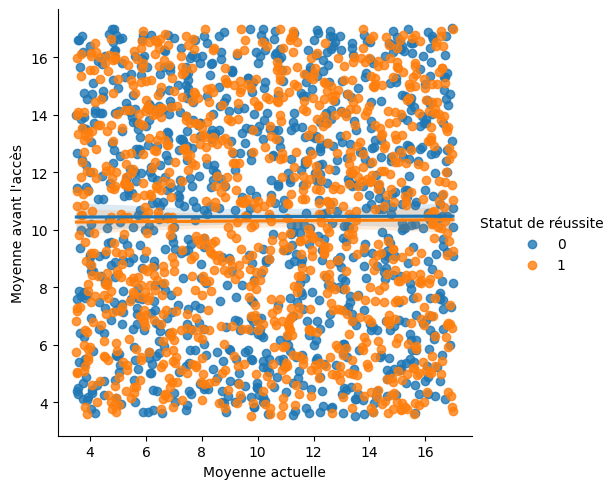

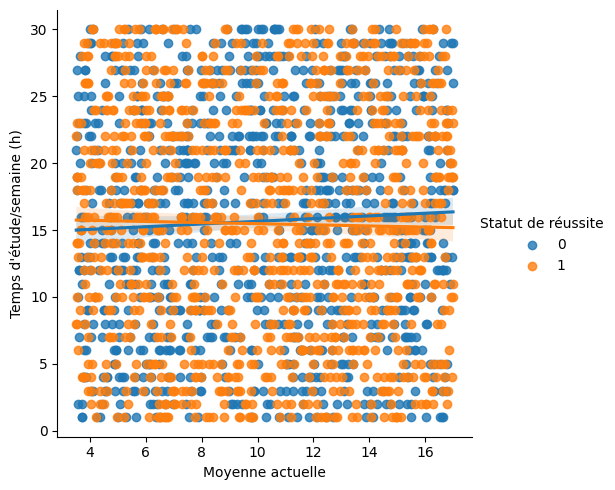

In [84]:
# Liste des colonnes à tracer
modules1 = ['Durée par session (min)', 'Moyenne des notes', "Moyenne avant l'accès", "Temps d'étude/semaine (h)"]

# Tracer un lmplot pour chaque colonne
for module in modules1:
    if df[module].dtype == 'object':
        try:
            df[module] = df[module].astype(float)
        except ValueError:
            print(f"La colonne {module} contient des valeurs non numériques.")
            continue
    sns.lmplot(x='Moyenne actuelle', y=module, hue='Statut de réussite', data=df)
    plt.show()  # Afficher le lmplot


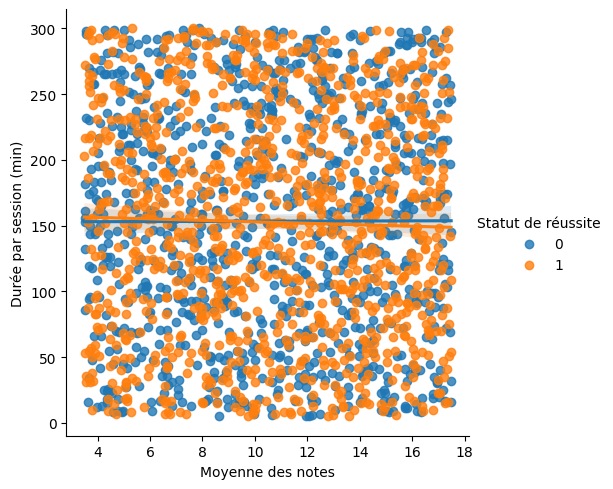

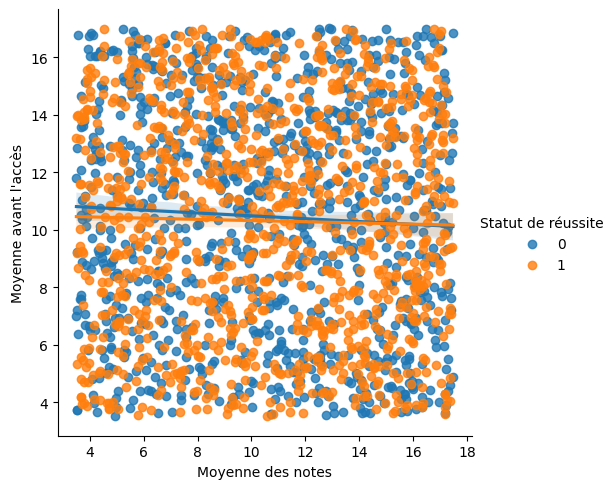

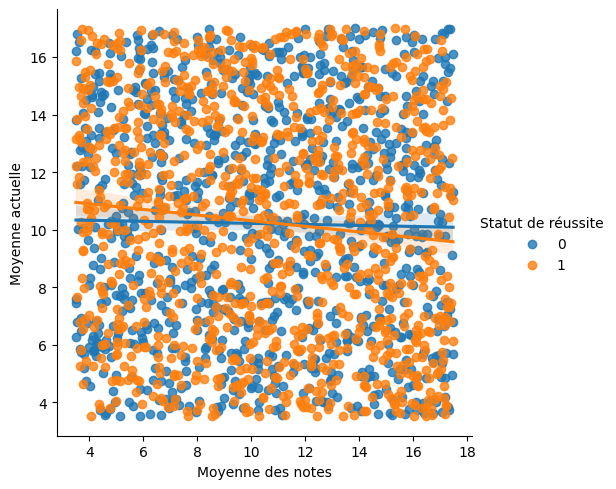

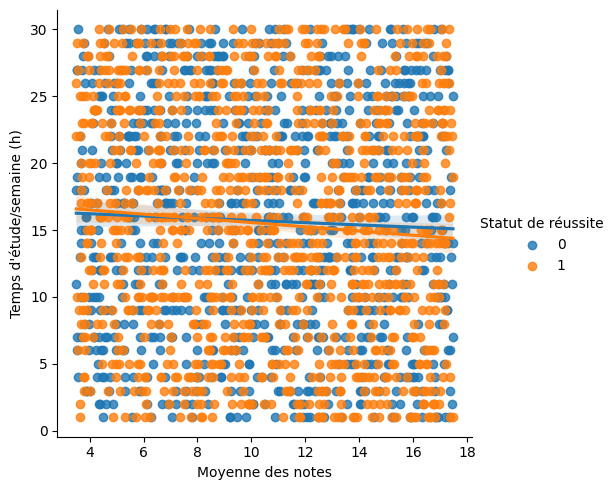

In [85]:
# Liste des colonnes à tracer
modules1 = ['Durée par session (min)', "Moyenne avant l'accès", 'Moyenne actuelle', "Temps d'étude/semaine (h)"]

# Tracer un lmplot pour chaque colonne
for module in modules1:
    if df[module].dtype == 'object':
        try:
            df[module] = df[module].astype(float)
        except ValueError:
            print(f"La colonne {module} contient des valeurs non numériques.")
            continue
    sns.lmplot(x='Moyenne des notes', y=module, hue='Statut de réussite', data=df)
    plt.show()  # Afficher le lmplot


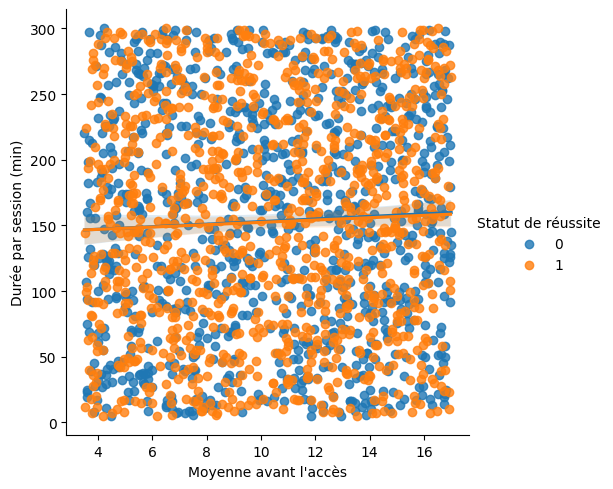

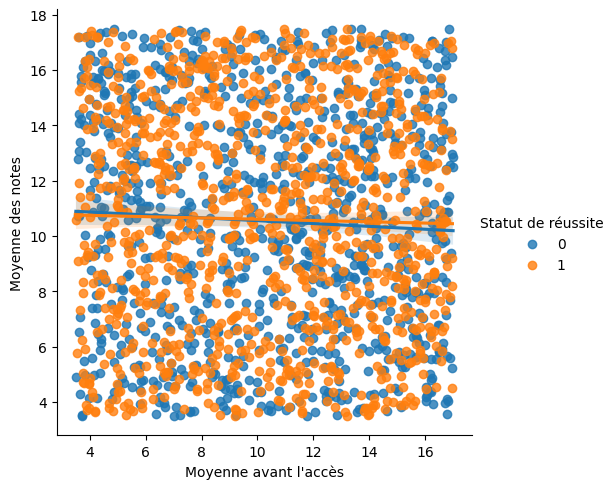

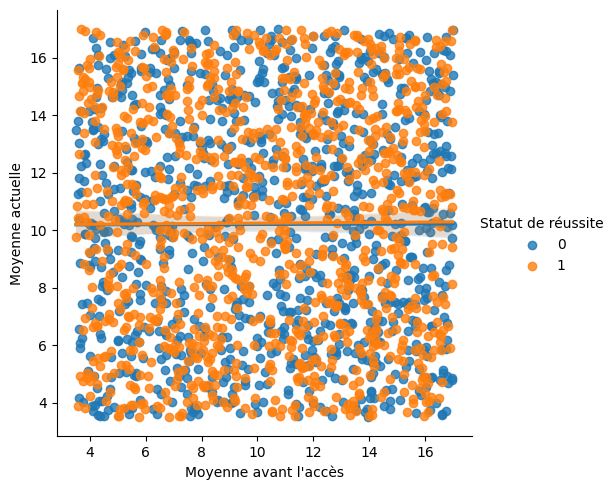

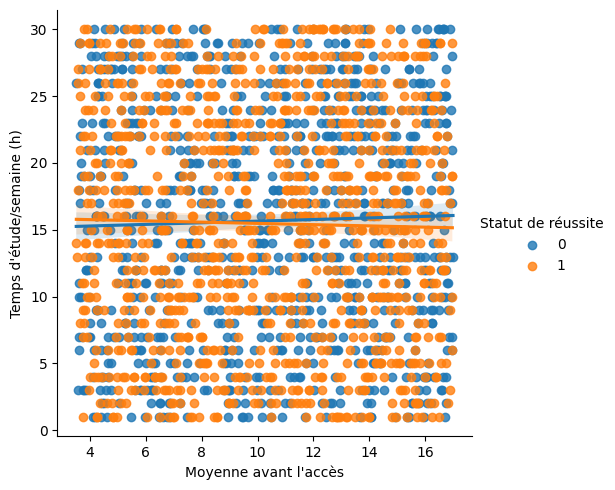

In [86]:
# Liste des colonnes à tracer
modules1 = ['Durée par session (min)', 'Moyenne des notes', 'Moyenne actuelle', "Temps d'étude/semaine (h)"]

# Tracer un lmplot pour chaque colonne
for module in modules1:
    if df[module].dtype == 'object':
        try:
            df[module] = df[module].astype(float)
        except ValueError:
            print(f"La colonne {module} contient des valeurs non numériques.")
            continue
    sns.lmplot(x="Moyenne avant l'accès", y=module, hue='Statut de réussite', data=df)
    plt.show()  # Afficher le lmplot


In [87]:
# Sélectionner uniquement les colonnes numériques et la colonne 'Mle' pour le calcul de la corrélation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculer la corrélation
correlation = numeric_df.corr()['Statut de réussite'].sort_values()

# Afficher la corrélation
print(correlation)

Moyenne avant l'accès       -0.019184
Temps d'étude/semaine (h)   -0.012224
Durée par session (min)     -0.004537
Moyenne actuelle             0.005700
Moyenne des notes            0.008353
Statut de réussite           1.000000
Name: Statut de réussite, dtype: float64


## Encodage - Nettoyage - TrainTest

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [89]:
df.head()

,UFR,Filière,Sexe,Niveau,Fréquence d'utilisation,Durée par session (min),Impact sur la motivation,Moyenne des notes,Moyenne avant l'accès,Moyenne actuelle,Temps d'étude/semaine (h),Usage de la connexion,Statut de réussite
0,SEG,Philo,Masculin,L1,Quotidienne,138,Inchangé,11.428811,16.855653,8.785321,18,Recherche,0
1,SEG,Geographie,Masculin,L1,Quotidienne,209,Inchangé,10.647497,12.686134,3.775125,21,Recherche,1
2,SEG,MPCI,Masculin,L1,Occasionnelle,216,Augmenté,12.512530,13.985956,6.237750,21,Recherche,1
3,SEG,Geographie,Feminin,L3,Quotidienne,205,Diminué,6.115486,9.341862,6.674597,12,Autres,0
4,ST,SEG,Masculin,L1,Occasionnelle,212,Augmenté,9.775584,5.243999,3.827875,18,Recherche,1


In [90]:
from sklearn.preprocessing import LabelEncoder

# Instanciation d'un encodeur
label_encoder = LabelEncoder()

# Sélection des colonnes à encoder
categorical_columns = ["UFR", "Filière", "Sexe", "Niveau", "Fréquence d'utilisation", "Impact sur la motivation", "Usage de la connexion"]

# Application de l'encodage sur chaque colonne catégorielle
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [91]:
df.head()

,UFR,Filière,Sexe,Niveau,Fréquence d'utilisation,Durée par session (min),Impact sur la motivation,Moyenne des notes,Moyenne avant l'accès,Moyenne actuelle,Temps d'étude/semaine (h),Usage de la connexion,Statut de réussite
0,1,4,1,0,2,138,2,11.428811,16.855653,8.785321,18,1,0
1,1,0,1,0,2,209,2,10.647497,12.686134,3.775125,21,1,1
2,1,3,1,0,1,216,0,12.512530,13.985956,6.237750,21,1,1
3,1,0,0,2,2,205,1,6.115486,9.341862,6.674597,12,0,0
4,2,5,1,0,1,212,0,9.775584,5.243999,3.827875,18,1,1
